In [4]:
import obspy
import numpy as np
import scipy as sp

st = obspy.read("data/20101201.014700.A.SEED")

HHN_st = obspy.core.stream.Stream()
for i in range(len(st)):
    if st[i].stats['channel'] == 'HHN':
        HHN_st.append(st[i]) 

In [5]:
HHN_st

35 Trace(s) in Stream:

CN.BELQ..HHN | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.990000Z | 100.0 Hz, 36000 samples
...
(33 other traces)
...
CN.DMCQ..HHN | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.990000Z | 100.0 Hz, 36000 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

In [6]:
import matplotlib.pylab as plt
from __future__ import print_function
plt.switch_backend("nbagg")
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8

<IPython.core.display.Javascript object>


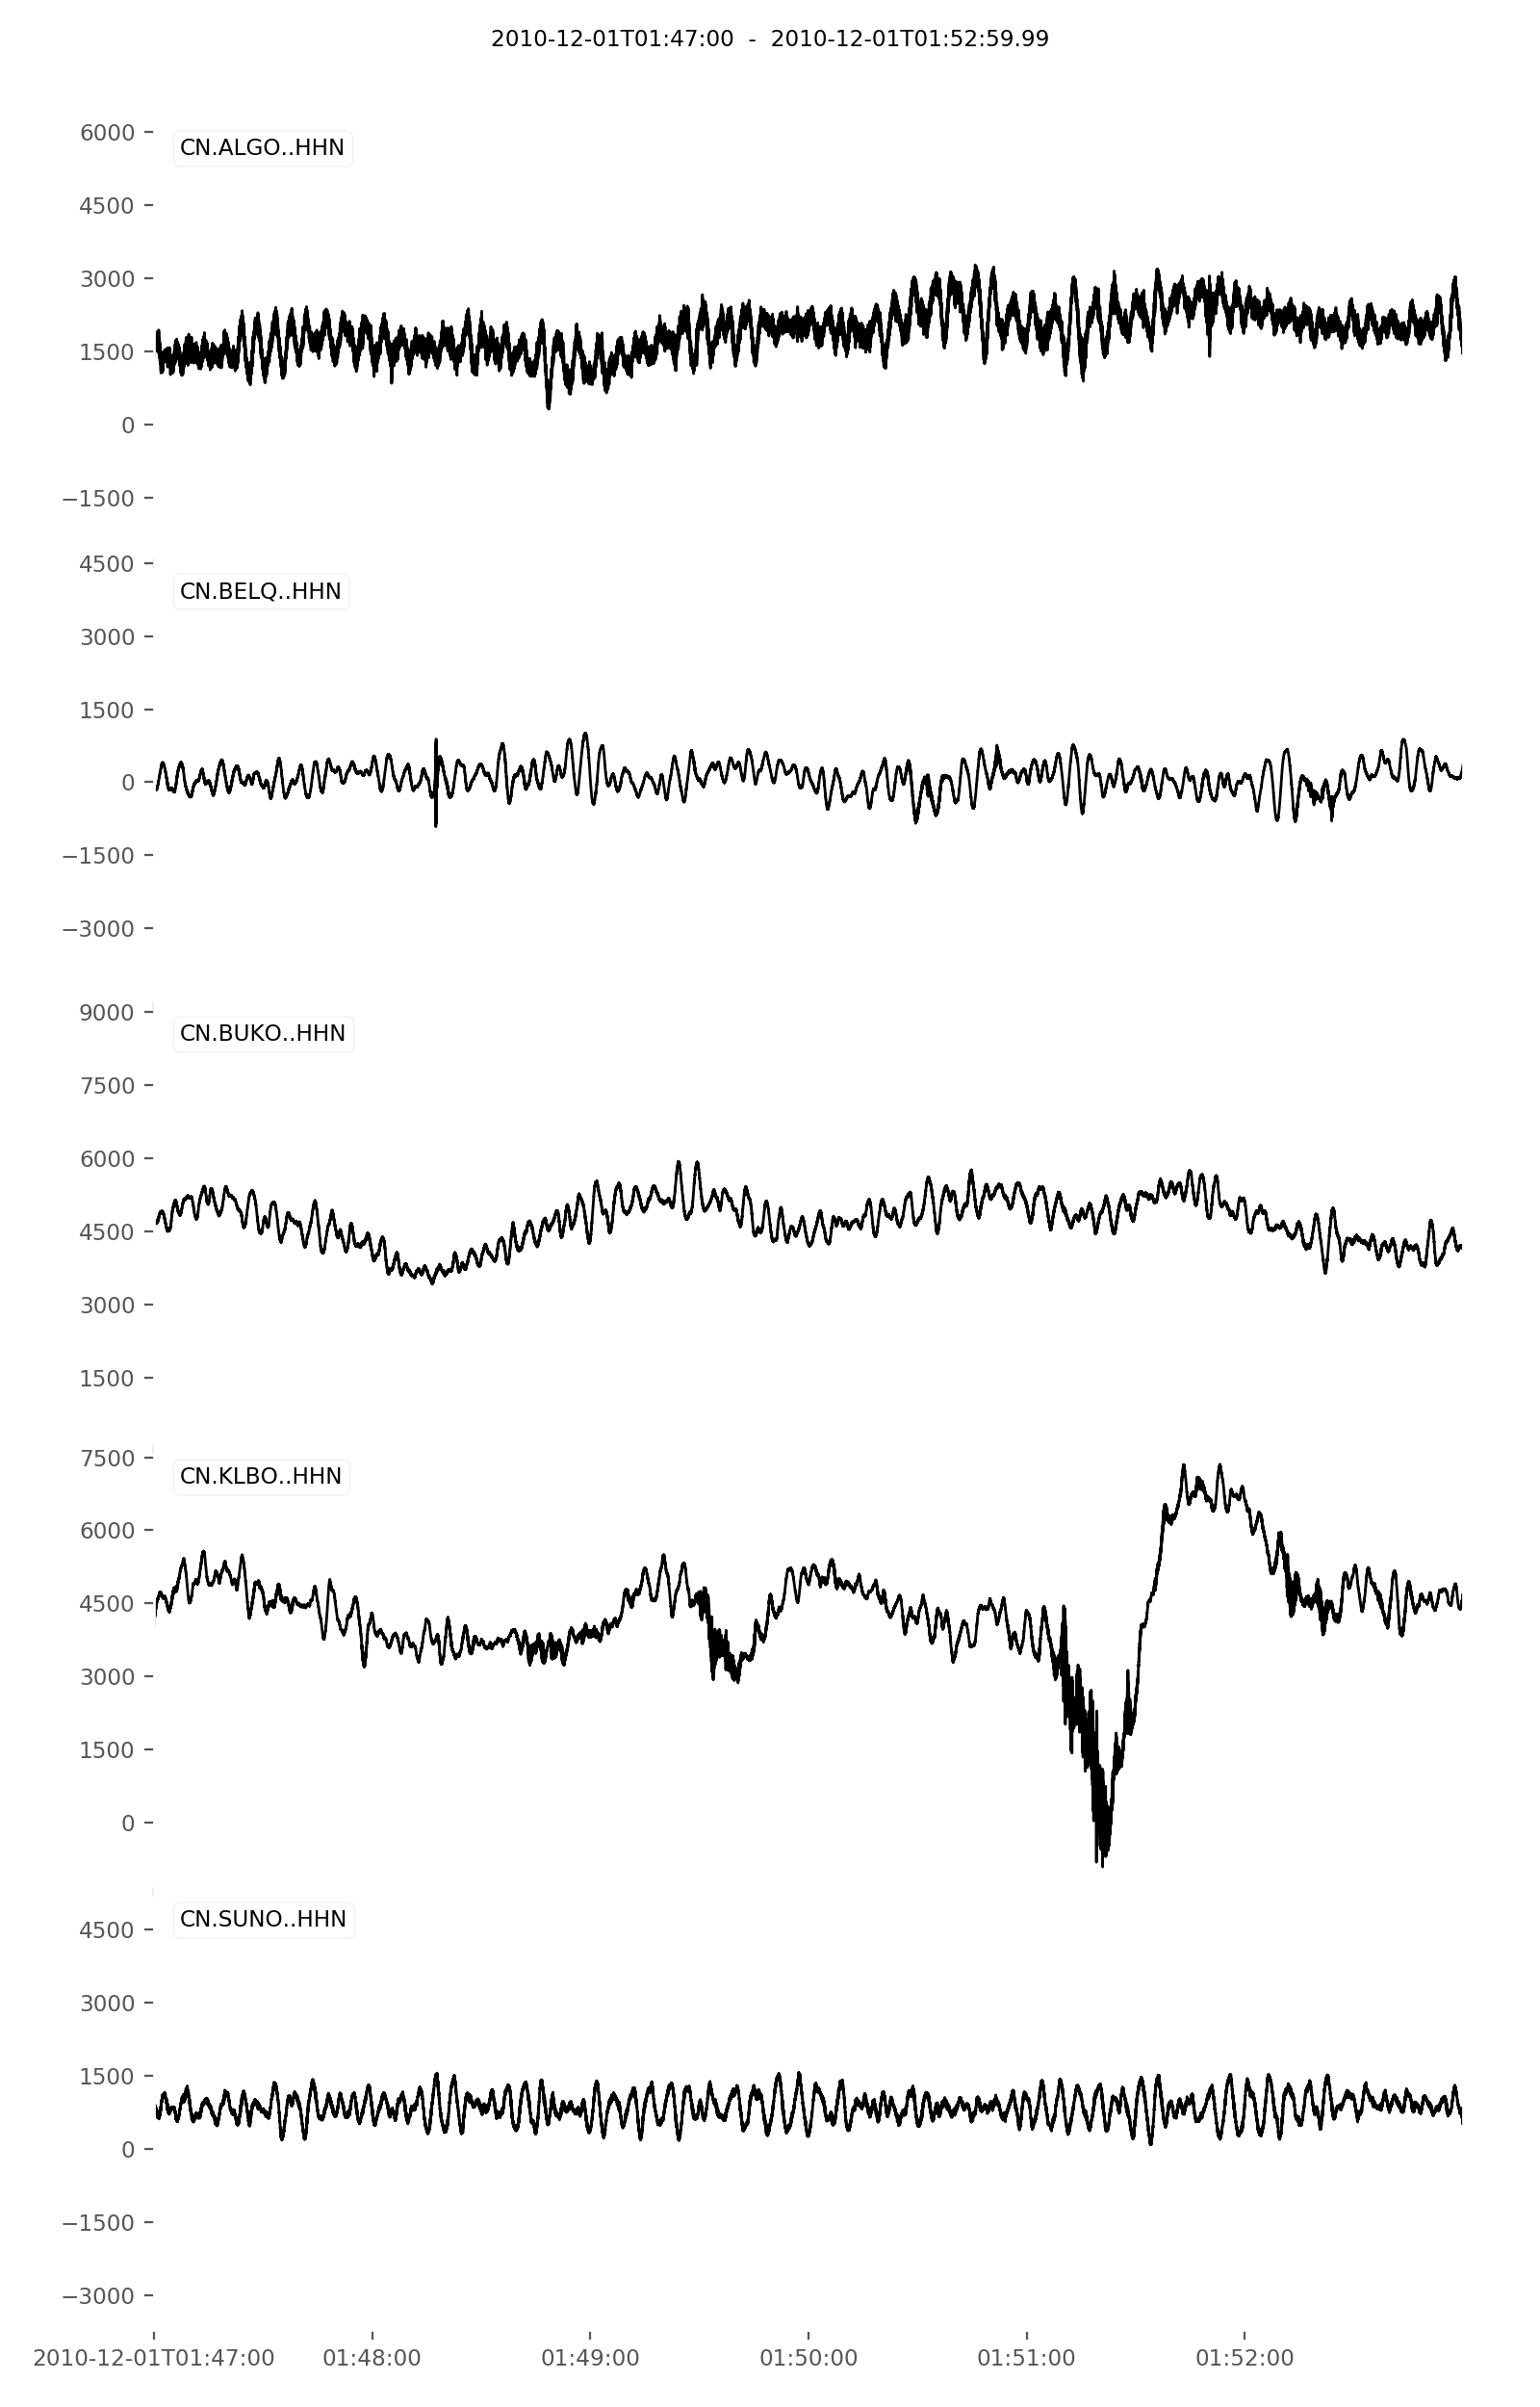

In [7]:
HHN_st[:5].plot()

In [8]:
print("Station: ", [tr.stats['station'] for tr in HHN_st])
print("Sampling Rate: ", [tr.stats['sampling_rate'] for tr in HHN_st])
print("(delta, npts): ", [(tr.stats['delta'], tr.stats['npts']) for tr in HHN_st])
print("(start time, end time): ", np.array([(tr.stats['starttime'], tr.stats['endtime']) for tr in HHN_st]))

Station:  ['BELQ', 'ALGO', 'BUKO', 'KLBO', 'SUNO', 'PEMO', 'BANO', 'KILO', 'PLVO', 'TOBO', 'CLWO', 'DELO', 'BMRO', 'PKRO', 'ORIO', 'WLVO', 'DRWO', 'DREO', 'LSQQ', 'BWLO', 'BRCO', 'TORO', 'ALFO', 'PECO', 'ACTO', 'BASO', 'MATQ', 'MALO', 'STCO', 'TYNO', 'ELFO', 'LATQ', 'CHGQ', 'PNPO', 'DMCQ']
Sampling Rate:  [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
(delta, npts):  [(0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 36000), (0.01, 360

In [9]:
HHN_stats = [(np.mean(tr.data), np.std(tr.data), (min(tr.data), max(tr.data))) for tr in HHN_st]
print("Mean\t\t\tStandard Deviation\tmin/max")
for s in HHN_stats:
    print(s[0], "\t\t", s[1], "\t\t", (s[2][0], s[2][1]))

Mean			Standard Deviation	min/max
94.5879722222 		 285.709965281 		 (-912, 1010)
1914.63316667 		 455.780504909 		 (323, 3282)
4703.25802778 		 493.670956041 		 (3408, 5931)
4356.17825 		 1078.55269921 		 (-904, 7354)
865.733888889 		 266.272706213 		 (85, 1575)
190.963277778 		 359.149798964 		 (-902, 1642)
2556.37505556 		 794.416364383 		 (684, 4336)
-180.386861111 		 446.887602112 		 (-1614, 1466)
302.67325 		 342.440695248 		 (-892, 1464)
1800.91158333 		 330.141794771 		 (678, 2915)
-518.295305556 		 1003.11948324 		 (-7653, 3511)
3457.56988889 		 293.837587328 		 (2300, 4159)
741.9085 		 250.580438549 		 (-75, 1473)
327.520916667 		 175.736634726 		 (-785, 1854)
266.673805556 		 1537.62695776 		 (-4362, 3436)
344.998222222 		 142.564706935 		 (-136, 855)
-2288.19722222 		 934.765762574 		 (-5699, 1125)
-6440.36363889 		 3190.9745242 		 (-18160, 7257)
-733.563444444 		 411.651725339 		 (-4556, 3200)
956.668361111 		 387.333511028 		 (-415, 1931)
-289.695277778 		 370.147282593 		

it seems that many of these data are not normalized at 0. Let's break them up into those that are roughly around 0 with those that are not at all. We will do this by using a very poor method (but still pretty reliable for our dataset) of $|\mu| - \sigma < 0$

In [20]:
around0 = obspy.core.stream.Stream()
notaround0 = obspy.core.stream.Stream()
for tr in HHN_st:
    if (abs(np.mean(tr.data))-np.std(tr.data)) < 0:
        around0.append(tr)
    else:
        notaround0.append(tr)


<IPython.core.display.Javascript object>


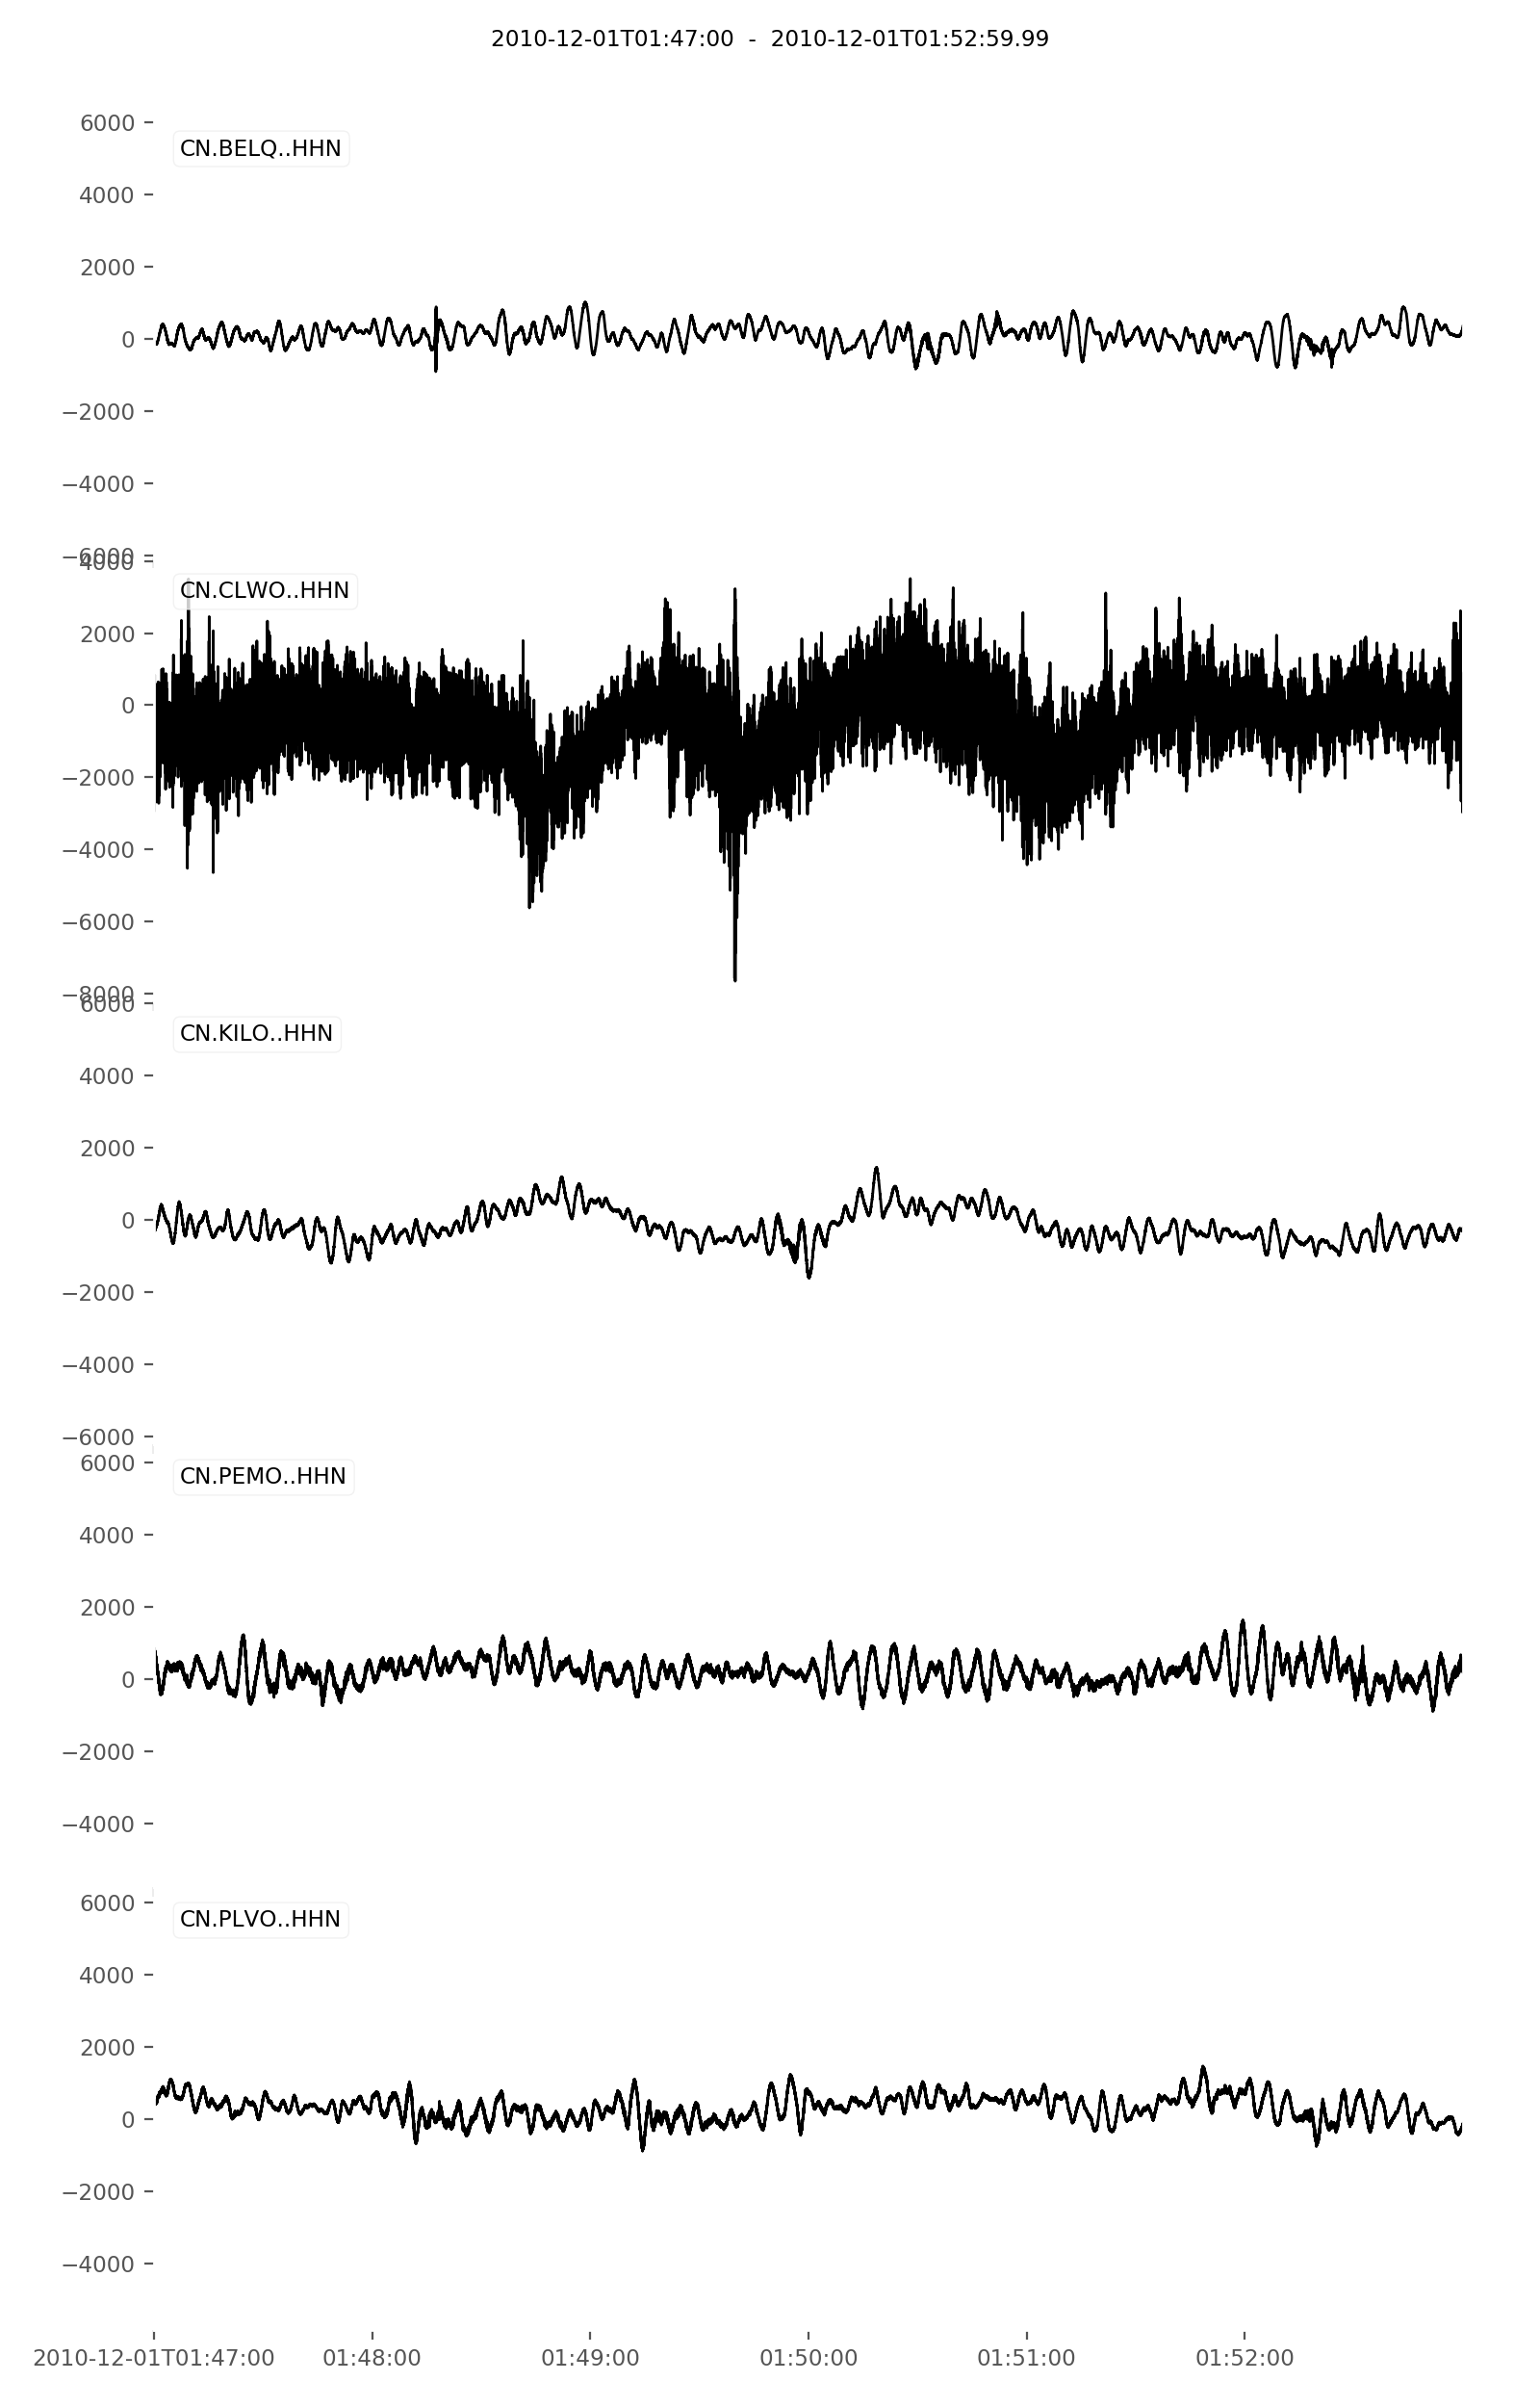

In [21]:
around0[:5].plot()

<IPython.core.display.Javascript object>


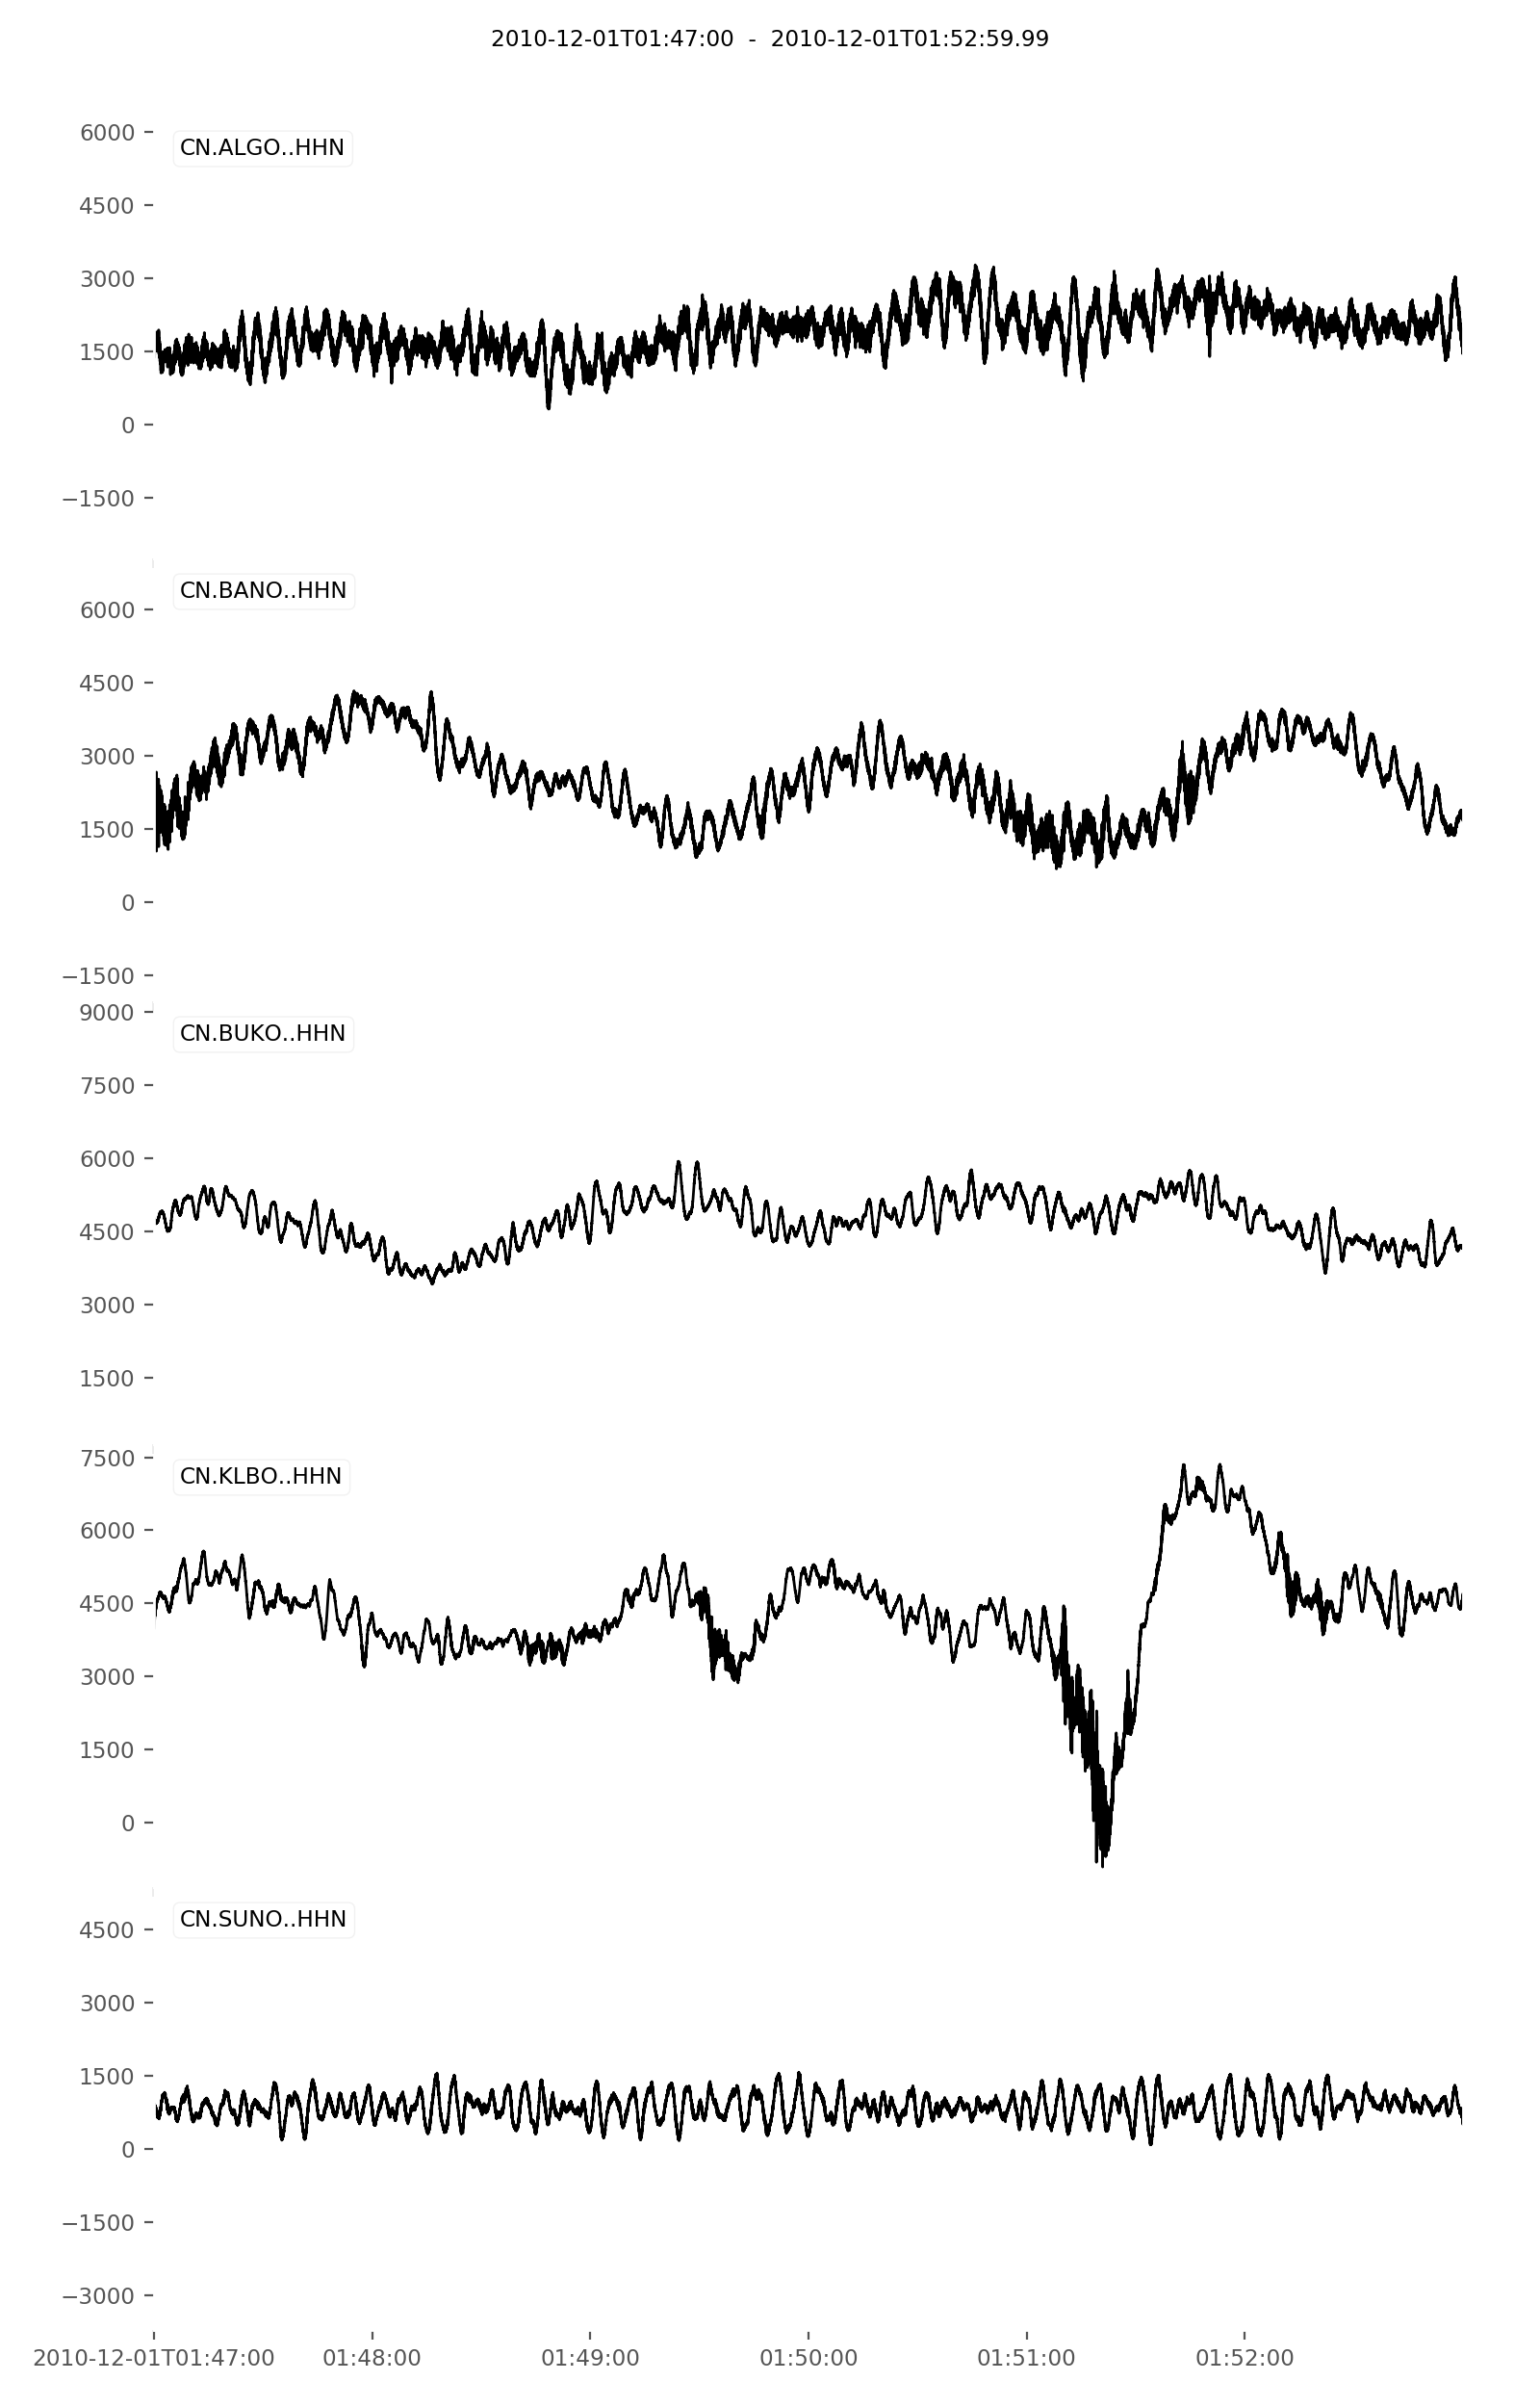

In [22]:
notaround0[:5].plot()